In [154]:
import pandas as pd 
from datetime import timedelta
df=pd.read_csv(r'C:\Users\FPM\Documents\Python Data Analysis\Data\archive\USvideos.csv')
df['publish_time']=pd.to_datetime(df['publish_time'], utc=True).dt.tz_localize(None)
df['trending_date']=pd.to_datetime(df['trending_date'],format='%y.%d.%m')
df['diff']=df['trending_date']-df['publish_time']
df['diff']=df['diff'].dt.days
df[df['diff'] >=5].head().sort_values(by ='views' ,ascending=False)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,diff
130,8l_e6bx8UG8,2017-11-14,Remy Ma - Wake Me Up (Audio) ft. Lil' Kim,RemyMaVEVO,10,2017-11-08 17:00:00,"Columbia|""Hip Hop""|""Remy Ma feat. Lil' Kim""|""W...",1231518,32648,6221,9288,https://i.ytimg.com/vi/8l_e6bx8UG8/default.jpg,False,False,False,Remy Ma - Wake Me Up featuring Lil' Kim (Offic...,5
79,AJYb0Yom5UQ,2017-11-14,Howard Stern: George Takei Talks About Harvey ...,cocheusadoooo,23,2017-10-17 20:01:44,"Harvey Weinstein|""Howard Stern""|""Howard Stern ...",148226,355,47,178,https://i.ytimg.com/vi/AJYb0Yom5UQ/default.jpg,False,False,False,While talking about Harvey Weinstein. George T...,27
35,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,22,2017-04-21 06:47:32,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,206
29,n30k5CwLhS4,2017-11-14,Nick Andopolis: Drummer,FaeryInLoveInc,1,2011-05-29 17:03:12,"freaks and geeks|""jason segel""|""judd apatow""|""...",50867,715,238,246,https://i.ytimg.com/vi/n30k5CwLhS4/default.jpg,False,False,False,"The opening of Freaks and Geeks Episode 6, I'm...",2360
31,CBVGjS_EJok,2017-11-14,Amazon Christmas Advert 2017 - Toys & Games,Amazon.co.uk,24,2017-11-06 17:52:50,"Amazon|""Amazon Christmas""|""Amazon Xmas""|""Chris...",26000,119,69,0,https://i.ytimg.com/vi/CBVGjS_EJok/default.jpg,True,False,False,Shhhh. See how Amazon helps Dad create a magic...,7


In [155]:
import pandas as pd
import json
with open(r'C:\Users\FPM\Documents\Python Data Analysis\category.json',encoding='utf-8-sig') as f:
        data=json.load(f)
df_category=pd.json_normalize(data['items'])
df_cleaned=df_category[['id','snippet.title']]
pd.set_option('display.max_rows', None)
df_cleaned.rename(columns={'id':'category_id'},inplace=True)
df_cleaned['category_id'] = df_cleaned['category_id'].astype(int)
print(df_cleaned)


    category_id          snippet.title
0             1       Film & Animation
1             2       Autos & Vehicles
2            10                  Music
3            15         Pets & Animals
4            17                 Sports
5            18           Short Movies
6            19        Travel & Events
7            20                 Gaming
8            21          Videoblogging
9            22         People & Blogs
10           23                 Comedy
11           24          Entertainment
12           25        News & Politics
13           26          Howto & Style
14           27              Education
15           28   Science & Technology
16           29  Nonprofits & Activism
17           30                 Movies
18           31        Anime/Animation
19           32       Action/Adventure
20           33               Classics
21           34                 Comedy
22           35            Documentary
23           36                  Drama
24           37          

C:\Users\FPM\AppData\Local\Temp\ipykernel_16128\1224589415.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.rename(columns={'id':'category_id'},inplace=True)
C:\Users\FPM\AppData\Local\Temp\ipykernel_16128\1224589415.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['category_id'] = df_cleaned['category_id'].astype(int)


In [156]:
df_joined=pd.merge(df,df_cleaned, on='category_id',how='inner')
df_joined.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,diff,snippet.title
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,1,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,0,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,1,Entertainment


In [157]:
df_joined.describe().round()

,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,diff
count,40949,40949.0,40949,40949.0,40949.0,40949.0,40949.0,40949.0
mean,2018-02-27 06:22:42.494810624,20.0,2018-02-11 01:00:49.258589952,2360785.0,74267.0,3711.0,8447.0,16.0
min,2017-11-14 00:00:00,1.0,2006-07-23 08:24:11,549.0,0.0,0.0,0.0,-1.0
25%,2018-01-04 00:00:00,17.0,2017-12-27 21:00:00,242329.0,5424.0,202.0,614.0,2.0
50%,2018-02-26 00:00:00,24.0,2018-02-21 16:19:27,681861.0,18091.0,631.0,1856.0,4.0
75%,2018-04-24 00:00:00,25.0,2018-04-16 17:20:26,1823157.0,55417.0,1938.0,5755.0,8.0
max,2018-06-14 00:00:00,43.0,2018-06-14 01:31:53,225211923.0,5613827.0,1674420.0,1361580.0,4214.0
std,NaN,8.0,NaN,7394114.0,228885.0,29030.0,37430.0,146.0


In [158]:
from datetime import datetime as dt
df_joined['Year']=pd.to_datetime(df_joined['trending_date'],format='%y.%d.%m').dt.year
df_joined.rename(columns={'snippet.title':'Category'}, inplace=True)
df_joined.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,diff,Category,Year
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0,People & Blogs,2017
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0,Entertainment,2017
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,1,Comedy,2017
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,0,Entertainment,2017
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,1,Entertainment,2017


In [168]:
df_plot=df_joined.groupby(['Category', 'Year'])['Category'].count().reset_index(name='count')
print(df_plot)

                 Category  Year  count
0        Autos & Vehicles  2017    105
1        Autos & Vehicles  2018    279
2                  Comedy  2017    894
3                  Comedy  2018   2563
4               Education  2017    362
5               Education  2018   1294
6           Entertainment  2017   2339
7           Entertainment  2018   7625
8        Film & Animation  2017    534
9        Film & Animation  2018   1811
10                 Gaming  2017     85
11                 Gaming  2018    732
12          Howto & Style  2017    879
13          Howto & Style  2018   3267
14                  Music  2017   1563
15                  Music  2018   4909
16        News & Politics  2017    768
17        News & Politics  2018   1719
18  Nonprofits & Activism  2017     14
19  Nonprofits & Activism  2018     43
20         People & Blogs  2017    765
21         People & Blogs  2018   2445
22         Pets & Animals  2017    183
23         Pets & Animals  2018    737
24   Science & Technology

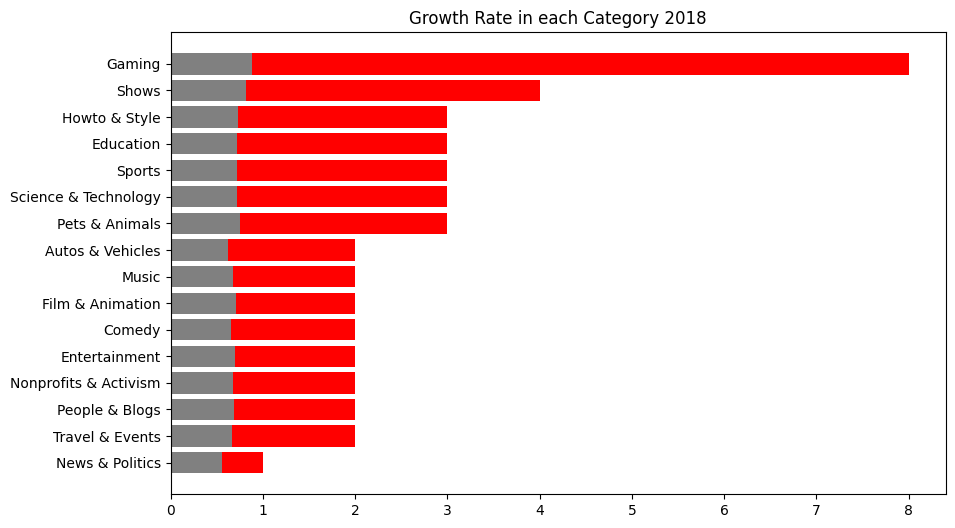

Year               Category  2017  2018  Growth_rate  Growth_rate1
0                    Gaming    85   732          8.0      0.883880
1                     Shows     9    48          4.0      0.812500
2             Howto & Style   879  3267          3.0      0.730946
3                 Education   362  1294          3.0      0.720247
4                    Sports   473  1701          3.0      0.721928
5      Science & Technology   526  1875          3.0      0.719467
6            Pets & Animals   183   737          3.0      0.751696
7          Autos & Vehicles   105   279          2.0      0.623656
8                     Music  1563  4909          2.0      0.681605
9          Film & Animation   534  1811          2.0      0.705135
10                   Comedy   894  2563          2.0      0.651190
11            Entertainment  2339  7625          2.0      0.693246
12    Nonprofits & Activism    14    43          2.0      0.674419
13           People & Blogs   765  2445          2.0      0.68

In [160]:
import matplotlib.pyplot as plt
df_pivot=df_plot.pivot(index='Category', columns='Year', values='count')
df_pivot['Growth_rate']=(((df_pivot[2018] - df_pivot[2017]) /df_pivot[2017])).round()
df_pivot['Growth_rate1']=(((df_pivot[2018] - df_pivot[2017]) /df_pivot[2018]))
df_sorted=df_pivot.sort_values(by='Growth_rate' ,ascending=False)
df_sorted = df_sorted.reset_index()
plt.figure(figsize=(10,6))
plt.title('Growth Rate in each Category 2018')
plt.barh(df_sorted['Category'], df_sorted['Growth_rate'], color='red')
plt.barh(df_sorted['Category'], df_sorted['Growth_rate1'], color='gray')
plt.gca().invert_yaxis()
plt.show()
print(df_sorted)

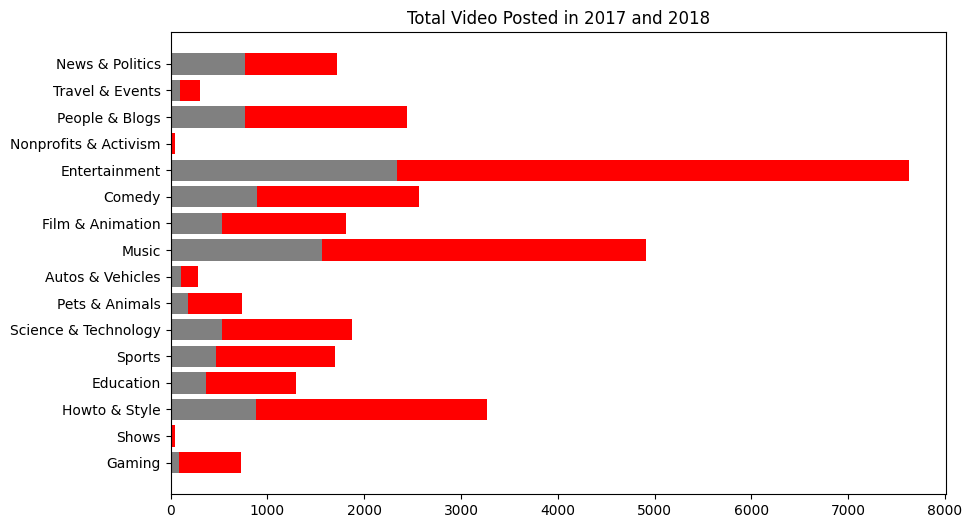

In [161]:
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Category'],df_sorted[2018], color='red',label='2018')
plt.barh(df_sorted['Category'],df_sorted[2017], color='gray',label='2017')
plt.title('Total Video Posted in 2017 and 2018')
plt.show()